<a href="https://colab.research.google.com/github/Charlsgit/City-Temperature-Clustering-K-Means-Machine-Learning-Project/blob/main/City_Temperature_Clustering_Using_K_Means(Unsupervised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Step 2: Load the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data /Average Temperature of Cities.csv")
print(df.head())                    #monthly average temperatures (in °C and °F)
                                    #yearly average temperature (calculated from those 12 months)

   Country         City           Jan           Feb           Mar  \
0  Algeria      Algiers  11.2\n(52.2)  11.9\n(53.4)  12.8\n(55.0)   
1  Algeria  Tamanrasset  12.8\n(55.0)  15.0\n(59.0)  18.1\n(64.6)   
2  Algeria      Reggane  16.0\n(60.8)  18.2\n(64.8)  23.1\n(73.6)   
3   Angola       Luanda  26.7\n(80.1)  28.5\n(83.3)  28.6\n(83.5)   
4    Benin      Cotonou  27.3\n(81.1)  28.5\n(83.3)  28.9\n(84.0)   

            Apr           May           Jun            Jul            Aug  \
0  14.7\n(58.5)  17.7\n(63.9)  21.3\n(70.3)   24.6\n(76.3)   25.2\n(77.4)   
1  22.2\n(72.0)  26.1\n(79.0)  28.9\n(84.0)   28.7\n(83.7)   28.2\n(82.8)   
2  27.9\n(82.2)  32.2\n(90.0)  36.4\n(97.5)  39.8\n(103.6)  38.4\n(101.1)   
3  28.2\n(82.8)  27.0\n(80.6)  23.9\n(75.0)   22.1\n(71.8)   22.1\n(71.8)   
4  28.6\n(83.5)  27.8\n(82.0)  26.5\n(79.7)   25.8\n(78.4)   25.6\n(78.1)   

            Sep           Oct           Nov           Dec          Year  \
0  23.2\n(73.8)  19.4\n(66.9)  15.2\n(59.4)  12

#Step 3: Explore the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    451 non-null    object
 1   City       451 non-null    object
 2   Jan        451 non-null    object
 3   Feb        451 non-null    object
 4   Mar        451 non-null    object
 5   Apr        451 non-null    object
 6   May        451 non-null    object
 7   Jun        451 non-null    object
 8   Jul        451 non-null    object
 9   Aug        451 non-null    object
 10  Sep        451 non-null    object
 11  Oct        451 non-null    object
 12  Nov        451 non-null    object
 13  Dec        451 non-null    object
 14  Year       451 non-null    object
 15  Continent  451 non-null    object
dtypes: object(16)
memory usage: 56.5+ KB


##Counting the NULL values if any

In [ ]:
print(df.isnull().sum()) #Counts the NULL values if any

Country      0
City         0
Jan          0
Feb          0
Mar          0
Apr          0
May          0
Jun          0
Jul          0
Aug          0
Sep          0
Oct          0
Nov          0
Dec          0
Year         0
Continent    0
dtype: int64


#Step 4: Clean the Data

In [ ]:
df.drop(columns=["Country","City","Continent"],axis=1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,11.2\n(52.2),11.9\n(53.4),12.8\n(55.0),14.7\n(58.5),17.7\n(63.9),21.3\n(70.3),24.6\n(76.3),25.2\n(77.4),23.2\n(73.8),19.4\n(66.9),15.2\n(59.4),12.1\n(53.8),17.4\n(63.3)
1,12.8\n(55.0),15.0\n(59.0),18.1\n(64.6),22.2\n(72.0),26.1\n(79.0),28.9\n(84.0),28.7\n(83.7),28.2\n(82.8),26.5\n(79.7),22.4\n(72.3),17.3\n(63.1),13.9\n(57.0),21.7\n(71.1)
2,16.0\n(60.8),18.2\n(64.8),23.1\n(73.6),27.9\n(82.2),32.2\n(90.0),36.4\n(97.5),39.8\n(103.6),38.4\n(101.1),35.5\n(95.9),29.2\n(84.6),22.0\n(71.6),17.8\n(64.0),28.3\n(82.9)
3,26.7\n(80.1),28.5\n(83.3),28.6\n(83.5),28.2\n(82.8),27.0\n(80.6),23.9\n(75.0),22.1\n(71.8),22.1\n(71.8),23.5\n(74.3),25.2\n(77.4),26.7\n(80.1),26.9\n(80.4),25.8\n(78.4)
4,27.3\n(81.1),28.5\n(83.3),28.9\n(84.0),28.6\n(83.5),27.8\n(82.0),26.5\n(79.7),25.8\n(78.4),25.6\n(78.1),26.0\n(78.8),26.7\n(80.1),27.6\n(81.7),27.3\n(81.1),27.2\n(81.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,22.1\n(71.8),22.7\n(72.9),22.2\n(72.0),20.6\n(69.1),18.8\n(65.8),17.5\n(63.5),16.7\n(62.1),16.2\n(61.2),16.4\n(61.5),17.3\n(63.1),18.7\n(65.7),20.7\n(69.3),19.2\n(66.6)
447,26.8\n(80.2),27.8\n(82.0),27.8\n(82.0),26.6\n(79.9),24.5\n(76.1),22.9\n(73.2),21.8\n(71.2),21.9\n(71.4),22.3\n(72.1),22.9\n(73.2),23.6\n(74.5),25.2\n(77.4),24.5\n(76.1)
448,26.0\n(78.8),26.0\n(78.8),26.2\n(79.2),26.7\n(80.1),26.5\n(79.7),26.5\n(79.7),26.7\n(80.1),27.4\n(81.3),27.8\n(82.0),27.9\n(82.2),27.3\n(81.1),26.4\n(79.5),26.8\n(80.2)
449,23.0\n(73.4),22.5\n(72.5),20.6\n(69.1),17.2\n(63.0),14.0\n(57.2),11.1\n(52.0),10.9\n(51.6),11.7\n(53.1),13.4\n(56.1),16.0\n(60.8),18.6\n(65.5),21.3\n(70.3),16.7\n(62.1)


#Step 5: Converting the features's data type

In [ ]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Year"]

# Extract Celsius (the first number before '\n') and convert to float
for col in months:
  df[col]=df[col].str.extract(r'([\d\.\-]+)').astype(float)

df.drop(columns=['Country',"City","Continent"],axis=1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,17.4
1,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,21.7
2,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,28.3
3,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,25.8
4,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,22.1,22.7,22.2,20.6,18.8,17.5,16.7,16.2,16.4,17.3,18.7,20.7,19.2
447,26.8,27.8,27.8,26.6,24.5,22.9,21.8,21.9,22.3,22.9,23.6,25.2,24.5
448,26.0,26.0,26.2,26.7,26.5,26.5,26.7,27.4,27.8,27.9,27.3,26.4,26.8
449,23.0,22.5,20.6,17.2,14.0,11.1,10.9,11.7,13.4,16.0,18.6,21.3,16.7


#Selecting Features

In [ ]:
x = df[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Year"]]

#Step 6: Scaling Features (Standardize for fair distance)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Step 7: Choose the Number of Clusters K (Elbow Method)

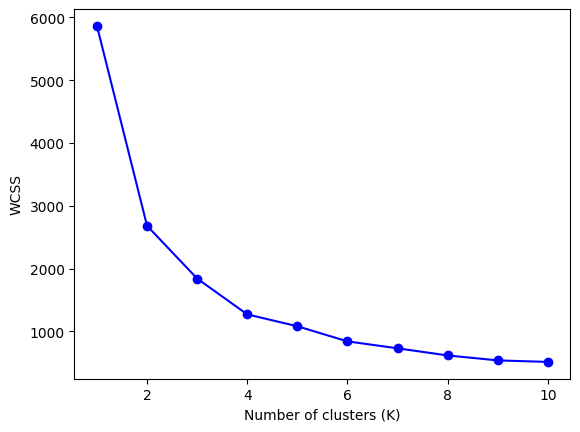

In [ ]:
#from IPython.core import prefilter
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,'bo-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

#Step 8: Applying Kmeans Clustring (Fitting the data)

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster']= kmeans.fit_predict(x_scaled)

#Step 9: Analyzing the Extracted clusters

In [ ]:
df.groupby('Country')[months].mean()
df.drop(columns=["Country","City","Continent"])

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Cluster
0,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,17.4,0
1,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,21.7,0
2,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,28.3,0
3,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,25.8,0
4,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,27.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,22.1,22.7,22.2,20.6,18.8,17.5,16.7,16.2,16.4,17.3,18.7,20.7,19.2,2
447,26.8,27.8,27.8,26.6,24.5,22.9,21.8,21.9,22.3,22.9,23.6,25.2,24.5,0
448,26.0,26.0,26.2,26.7,26.5,26.5,26.7,27.4,27.8,27.9,27.3,26.4,26.8,0
449,23.0,22.5,20.6,17.2,14.0,11.1,10.9,11.7,13.4,16.0,18.6,21.3,16.7,2


##The Count of Clusters

In [ ]:
print(df["Cluster"].value_counts())

Cluster
0    223
1    141
2     87
Name: count, dtype: int64


#Step 10: Visualize the patterns (The END)

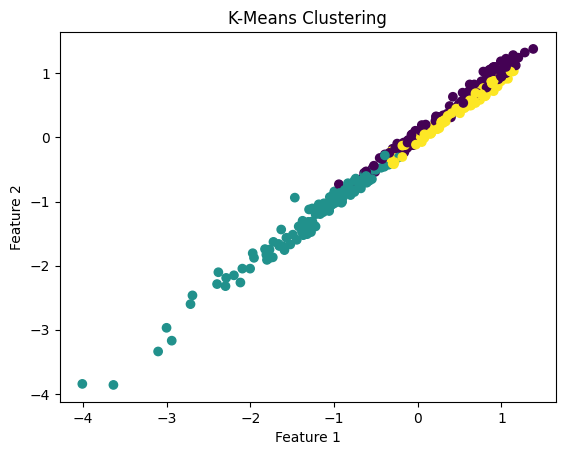

In [ ]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()